In [5]:
import tensorflow as tf
#load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


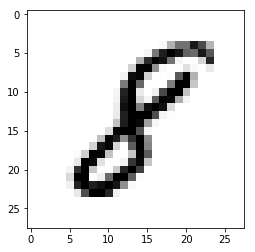

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [17]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


In [21]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [24]:
#optimizer
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 41s 675us/step - loss: 0.1264 - acc: 0.9619
Epoch 2/3
60000/60000 [==============================] - 39s 644us/step - loss: 0.1059 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 36s 599us/step - loss: 0.0961 - acc: 0.9706


In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 196us/step


[0.07866201729588211, 0.9779]

Enter an index between 0-60,000: 7777


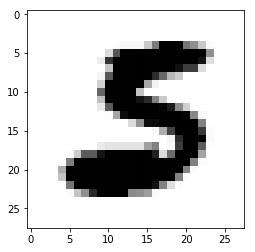

In [64]:
choice = input("Enter an index between 0-60,000: ")
image_index = int(choice)
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')


In [65]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Artifical Intilligence Guessed:' , pred.argmax())

Artifical Intilligence guessed: 5
